In [1]:
import GPy as gpy

In [2]:
import numpy as np

In [3]:
import time

In [4]:
x_all = np.genfromtxt('x_shuffled.csv', delimiter=',')

In [5]:
y_all = np.genfromtxt('y_shuffled.csv', delimiter=',')

In [6]:
x_train=x_all[:300,:]

In [7]:
y_train=y_all[:300]

In [8]:
def normalizeMatrix(matrix):
    matrix_new = matrix.copy()
    for i, _ in enumerate(matrix[0,:]):
        mu = np.mean(matrix[:,i])
        sigma = np.std(matrix[:,i])
        matrix_new[:,i] = (matrix[:,i] - mu) / sigma
    return matrix_new

In [9]:
def normalizeVector(vector):
    mu = np.mean(vector)
    sigma = np.std(vector)
    vector_new = (vector - mu) / sigma
    return vector_new, mu, sigma

In [10]:
def renormalizeVector(vector, mu, sigma):
    vector_old = (vector * sigma) + mu
    return vector_old

In [11]:
x_all_norm = normalizeMatrix(x_all)

In [12]:
y_all_norm, mu, sigma = normalizeVector(y_all)

In [13]:
x_train_norm = x_all_norm[:300,:]
y_train_norm = y_all_norm[:300]

In [14]:
ker = gpy.kern.Matern52(15,ARD=True)

In [15]:
X = np.random.uniform(-3.,3.,(50,2))

In [16]:
Y = np.sin(X[:,0:1]) * np.sin(X[:,1:2])+np.random.randn(50,1)*0.05

In [17]:
y_train_norm_ = np.zeros((300,1))

In [18]:
y_train_norm_[:,0] = y_train_norm[:]

In [19]:
y_all_norm_ = np.zeros((400,1))
y_all_norm_ = y_all_norm[:]

In [20]:
start = time.time()
m = gpy.models.GPRegression(x_train_norm,y_train_norm_, ker, noise_var=1.e-10)
stop = time.time()
time0=stop-start
print(time0)

0.027854442596435547


In [21]:
start = time.time()
m.optimize(optimizer='scg', messages=True,max_f_eval = 1000)
stop = time.time()
time1=stop-start
print(time1)

 /usr/local/lib/python3.7/dist-packages/paramz/optimization/optimization.py:225: FutureWarning:max_f_eval deprecated for SCG optimizer: use max_iters instead!
Ignoring max_f_eval!
Widget Javascript not detected.  It may not be installed or enabled properly.


52.686198234558105


In [36]:
start = time.time()
result, _ = m.predict(x_all_norm)
y_predict = renormalizeVector(result, mu, sigma)
stop = time.time()
time2 = stop - start
print(stop - start)

0.03012394905090332


In [37]:
import matplotlib.pyplot as plt

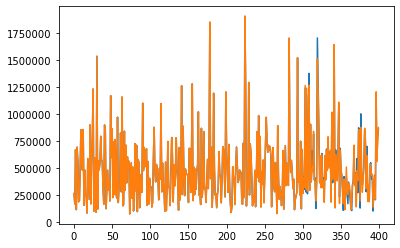

In [38]:
linaxis=range(0,400)
plt.plot(linaxis, y_all)
plt.plot(linaxis,y_predict)

In [26]:
np.savetxt('y_predict_python_GPy.csv', y_predict, delimiter=',')

In [27]:
import pandas as pd
time_df = pd.DataFrame({"GPy": [time0+time1, time2]})

In [28]:
time_csv = pd.read_csv("time.csv")

In [29]:
time_csv["GPy"] = time_df["GPy"]

In [30]:
time_csv.to_csv("time.csv")

In [31]:
time_csv = pd.read_csv("time.csv")